In [159]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [160]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
# print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]


In [161]:
def process(name, model, param, fix, f, a, kwargs={}):
    sse = {}
    for k in range(1, 10):
        kwargs[param] = k*fix
        kmeans = model(**kwargs).fit(data)
        # data[param] = kmeans.labels_
        # print(kmeans, kmeans.__methods__)
        sse[k] = eval("kmeans." + f + a) # Inertia: Sum of distances of samples to their closest cluster center
        
    kwargs.clear()
    
    plt.figure()
    plt.title(name)
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel(f)
    plt.show()

In [162]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

models = {
    "Kmeans": (KMeans, "n_clusters", 1, "inertia_", "", {"max_iter": 1000}),
    # "DBScan": (DBSCAN, "eps", 0.5, {}),
    "Gaussian Misture": (GaussianMixture, "n_components", 1, "aic", "(data)", {}),
    
}

C:\Users\nikhi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikhi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikhi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikhi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

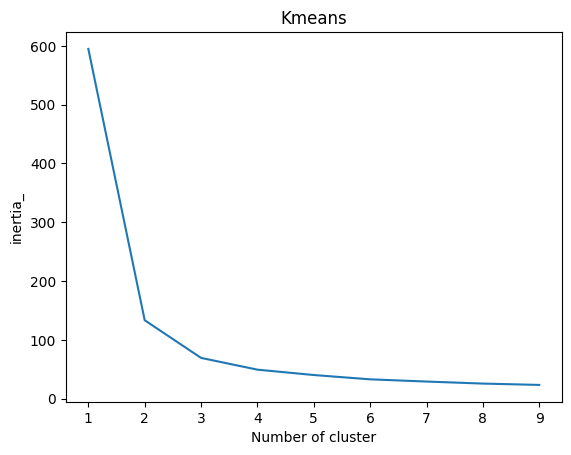

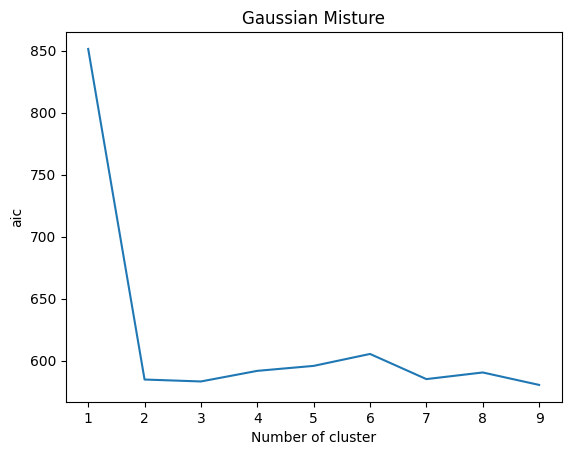

In [163]:
for model in models:
    process(model, *models[model])

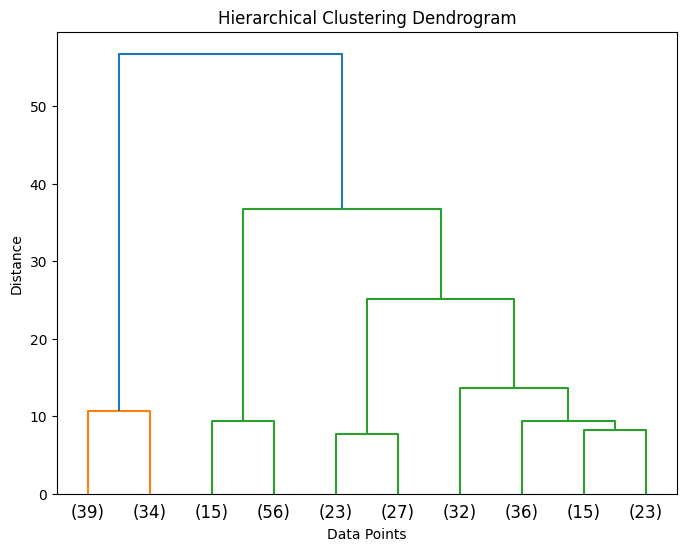

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs

# Generate some sample data (replace this with your dataset)
data, labels = make_blobs(n_samples=300, centers=4, random_state=0)

# Perform hierarchical clustering
linked = linkage(data, method='ward')

# Plot the linkage distances
plt.figure(figsize=(8, 6))
dendrogram(linked, p=10, truncate_mode='lastp')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
